In [1]:
from pyspark.sql import SparkSession
spark=SparkSession.builder.appName('LinearRegression').getOrCreate()

In [2]:
# File location and type
file_location = "tips.csv"
file_type = "csv"

# The applied options are for CSV files. For other file types, these will be ignored.
df =spark.read.csv(file_location,header=True,inferSchema=True)
df.show()

+----------+----+------+------+---+------+----+
|total_bill| tip|   sex|smoker|day|  time|size|
+----------+----+------+------+---+------+----+
|     16.99|1.01|Female|    No|Sun|Dinner|   2|
|     10.34|1.66|  Male|    No|Sun|Dinner|   3|
|     21.01| 3.5|  Male|    No|Sun|Dinner|   3|
|     23.68|3.31|  Male|    No|Sun|Dinner|   2|
|     24.59|3.61|Female|    No|Sun|Dinner|   4|
|     25.29|4.71|  Male|    No|Sun|Dinner|   4|
|      8.77| 2.0|  Male|    No|Sun|Dinner|   2|
|     26.88|3.12|  Male|    No|Sun|Dinner|   4|
|     15.04|1.96|  Male|    No|Sun|Dinner|   2|
|     14.78|3.23|  Male|    No|Sun|Dinner|   2|
|     10.27|1.71|  Male|    No|Sun|Dinner|   2|
|     35.26| 5.0|Female|    No|Sun|Dinner|   4|
|     15.42|1.57|  Male|    No|Sun|Dinner|   2|
|     18.43| 3.0|  Male|    No|Sun|Dinner|   4|
|     14.83|3.02|Female|    No|Sun|Dinner|   2|
|     21.58|3.92|  Male|    No|Sun|Dinner|   2|
|     10.33|1.67|Female|    No|Sun|Dinner|   3|
|     16.29|3.71|  Male|    No|Sun|Dinne

In [3]:
df.printSchema()

root
 |-- total_bill: double (nullable = true)
 |-- tip: double (nullable = true)
 |-- sex: string (nullable = true)
 |-- smoker: string (nullable = true)
 |-- day: string (nullable = true)
 |-- time: string (nullable = true)
 |-- size: integer (nullable = true)



In [4]:
df.columns

['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size']

In [5]:
### Handling Categorical Features
from pyspark.ml.feature import StringIndexer

In [6]:
indexer=StringIndexer(inputCol="sex",outputCol="sex_indexed")
df_r=indexer.fit(df).transform(df)
df_r.show()

+----------+----+------+------+---+------+----+-----------+
|total_bill| tip|   sex|smoker|day|  time|size|sex_indexed|
+----------+----+------+------+---+------+----+-----------+
|     16.99|1.01|Female|    No|Sun|Dinner|   2|        1.0|
|     10.34|1.66|  Male|    No|Sun|Dinner|   3|        0.0|
|     21.01| 3.5|  Male|    No|Sun|Dinner|   3|        0.0|
|     23.68|3.31|  Male|    No|Sun|Dinner|   2|        0.0|
|     24.59|3.61|Female|    No|Sun|Dinner|   4|        1.0|
|     25.29|4.71|  Male|    No|Sun|Dinner|   4|        0.0|
|      8.77| 2.0|  Male|    No|Sun|Dinner|   2|        0.0|
|     26.88|3.12|  Male|    No|Sun|Dinner|   4|        0.0|
|     15.04|1.96|  Male|    No|Sun|Dinner|   2|        0.0|
|     14.78|3.23|  Male|    No|Sun|Dinner|   2|        0.0|
|     10.27|1.71|  Male|    No|Sun|Dinner|   2|        0.0|
|     35.26| 5.0|Female|    No|Sun|Dinner|   4|        1.0|
|     15.42|1.57|  Male|    No|Sun|Dinner|   2|        0.0|
|     18.43| 3.0|  Male|    No|Sun|Dinne

In [7]:
indexer=StringIndexer(inputCols=["smoker","day","time"],outputCols=["smoker_indexed","day_indexed","time_index"])
df_r=indexer.fit(df_r).transform(df_r)
df_r.show()

+----------+----+------+------+---+------+----+-----------+--------------+-----------+----------+
|total_bill| tip|   sex|smoker|day|  time|size|sex_indexed|smoker_indexed|day_indexed|time_index|
+----------+----+------+------+---+------+----+-----------+--------------+-----------+----------+
|     16.99|1.01|Female|    No|Sun|Dinner|   2|        1.0|           0.0|        1.0|       0.0|
|     10.34|1.66|  Male|    No|Sun|Dinner|   3|        0.0|           0.0|        1.0|       0.0|
|     21.01| 3.5|  Male|    No|Sun|Dinner|   3|        0.0|           0.0|        1.0|       0.0|
|     23.68|3.31|  Male|    No|Sun|Dinner|   2|        0.0|           0.0|        1.0|       0.0|
|     24.59|3.61|Female|    No|Sun|Dinner|   4|        1.0|           0.0|        1.0|       0.0|
|     25.29|4.71|  Male|    No|Sun|Dinner|   4|        0.0|           0.0|        1.0|       0.0|
|      8.77| 2.0|  Male|    No|Sun|Dinner|   2|        0.0|           0.0|        1.0|       0.0|
|     26.88|3.12|  M

In [8]:
df_r.columns

['total_bill',
 'tip',
 'sex',
 'smoker',
 'day',
 'time',
 'size',
 'sex_indexed',
 'smoker_indexed',
 'day_indexed',
 'time_index']

In [9]:
from pyspark.ml.feature import VectorAssembler
featureassembler=VectorAssembler(inputCols=['tip','size','sex_indexed','smoker_indexed','day_indexed','time_index'],outputCol="Independent Features")
output=featureassembler.transform(df_r)

In [10]:
output.select('Independent Features').show()

+--------------------+
|Independent Features|
+--------------------+
|[1.01,2.0,1.0,0.0...|
|[1.66,3.0,0.0,0.0...|
|[3.5,3.0,0.0,0.0,...|
|[3.31,2.0,0.0,0.0...|
|[3.61,4.0,1.0,0.0...|
|[4.71,4.0,0.0,0.0...|
|[2.0,2.0,0.0,0.0,...|
|[3.12,4.0,0.0,0.0...|
|[1.96,2.0,0.0,0.0...|
|[3.23,2.0,0.0,0.0...|
|[1.71,2.0,0.0,0.0...|
|[5.0,4.0,1.0,0.0,...|
|[1.57,2.0,0.0,0.0...|
|[3.0,4.0,0.0,0.0,...|
|[3.02,2.0,1.0,0.0...|
|[3.92,2.0,0.0,0.0...|
|[1.67,3.0,1.0,0.0...|
|[3.71,3.0,0.0,0.0...|
|[3.5,3.0,1.0,0.0,...|
|(6,[0,1],[3.35,3.0])|
+--------------------+
only showing top 20 rows



In [11]:
output.show()

+----------+----+------+------+---+------+----+-----------+--------------+-----------+----------+--------------------+
|total_bill| tip|   sex|smoker|day|  time|size|sex_indexed|smoker_indexed|day_indexed|time_index|Independent Features|
+----------+----+------+------+---+------+----+-----------+--------------+-----------+----------+--------------------+
|     16.99|1.01|Female|    No|Sun|Dinner|   2|        1.0|           0.0|        1.0|       0.0|[1.01,2.0,1.0,0.0...|
|     10.34|1.66|  Male|    No|Sun|Dinner|   3|        0.0|           0.0|        1.0|       0.0|[1.66,3.0,0.0,0.0...|
|     21.01| 3.5|  Male|    No|Sun|Dinner|   3|        0.0|           0.0|        1.0|       0.0|[3.5,3.0,0.0,0.0,...|
|     23.68|3.31|  Male|    No|Sun|Dinner|   2|        0.0|           0.0|        1.0|       0.0|[3.31,2.0,0.0,0.0...|
|     24.59|3.61|Female|    No|Sun|Dinner|   4|        1.0|           0.0|        1.0|       0.0|[3.61,4.0,1.0,0.0...|
|     25.29|4.71|  Male|    No|Sun|Dinner|   4| 

In [12]:
finalized_data=output.select("Independent Features","total_bill")

In [13]:
finalized_data.show()

+--------------------+----------+
|Independent Features|total_bill|
+--------------------+----------+
|[1.01,2.0,1.0,0.0...|     16.99|
|[1.66,3.0,0.0,0.0...|     10.34|
|[3.5,3.0,0.0,0.0,...|     21.01|
|[3.31,2.0,0.0,0.0...|     23.68|
|[3.61,4.0,1.0,0.0...|     24.59|
|[4.71,4.0,0.0,0.0...|     25.29|
|[2.0,2.0,0.0,0.0,...|      8.77|
|[3.12,4.0,0.0,0.0...|     26.88|
|[1.96,2.0,0.0,0.0...|     15.04|
|[3.23,2.0,0.0,0.0...|     14.78|
|[1.71,2.0,0.0,0.0...|     10.27|
|[5.0,4.0,1.0,0.0,...|     35.26|
|[1.57,2.0,0.0,0.0...|     15.42|
|[3.0,4.0,0.0,0.0,...|     18.43|
|[3.02,2.0,1.0,0.0...|     14.83|
|[3.92,2.0,0.0,0.0...|     21.58|
|[1.67,3.0,1.0,0.0...|     10.33|
|[3.71,3.0,0.0,0.0...|     16.29|
|[3.5,3.0,1.0,0.0,...|     16.97|
|(6,[0,1],[3.35,3.0])|     20.65|
+--------------------+----------+
only showing top 20 rows



In [14]:
from pyspark.ml.regression import LinearRegression
##train test split
train_data,test_data=finalized_data.randomSplit([0.75,0.25])
regressor=LinearRegression(featuresCol='Independent Features', labelCol='total_bill')
regressor=regressor.fit(train_data)

In [15]:
regressor.coefficients

DenseVector([3.0096, 3.9028, -1.0374, 2.8955, -0.7431, -0.1797])

In [16]:
regressor.intercept

1.1228952389209261

In [17]:
### Predictions
pred_results=regressor.evaluate(test_data)

In [18]:
## Final comparison
pred_results.predictions.show()

+--------------------+----------+------------------+
|Independent Features|total_bill|        prediction|
+--------------------+----------+------------------+
|(6,[0,1],[1.45,2.0])|      9.55|13.292324056153557|
| (6,[0,1],[2.0,2.0])|     13.37|14.947596012524158|
| (6,[0,1],[2.0,3.0])|     16.31|18.850361024106498|
|(6,[0,1],[2.34,4.0])|     17.81|23.776385063263394|
| (6,[0,1],[3.6,3.0])|     24.06|23.665697624457337|
| (6,[0,1],[5.0,3.0])|     31.27|27.879117149764323|
|(6,[0,1],[5.92,3.0])|     29.03|30.647935694966055|
|[1.0,2.0,0.0,1.0,...|      12.6|14.833481549860746|
|[1.1,2.0,1.0,1.0,...|      12.9|14.097007741227117|
|[1.25,2.0,1.0,0.0...|      8.51|  9.98714923076605|
|[1.32,2.0,0.0,0.0...|      9.68|12.157993409187497|
|[1.36,3.0,1.0,0.0...|     18.64|14.220968633622512|
|[1.44,2.0,0.0,0.0...|      7.56| 11.59640279821327|
|[1.44,2.0,0.0,1.0...|      7.74| 16.15769911495723|
|[1.58,2.0,0.0,1.0...|     13.42| 14.17013111511228|
|[1.66,3.0,0.0,0.0...|     10.34| 17.084017448

In [19]:
### PErformance Metrics
pred_results.r2,pred_results.meanAbsoluteError,pred_results.meanSquaredError

(0.49319991708315525, 4.126149493352321, 27.656609051929014)

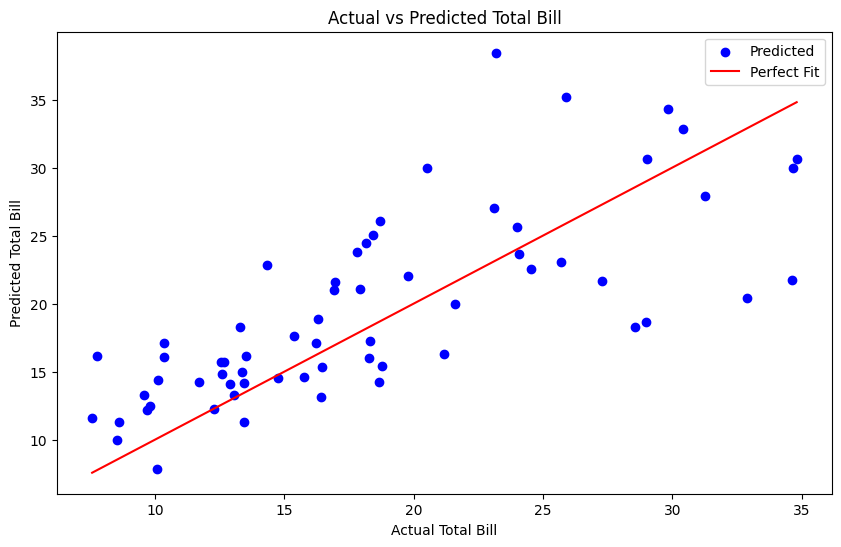

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

# Get predictions from the test dataset
pred_results = regressor.transform(test_data)

# Select actual and predicted values as pandas DataFrame for easy plotting
predictions = pred_results.select('prediction').collect()
actuals = pred_results.select('total_bill').collect()

# Convert to Pandas DataFrame
predicted_vs_actual = pd.DataFrame({
    'Actual': [row.total_bill for row in actuals],
    'Predicted': [row.prediction for row in predictions]
})

# Plot the Actual vs Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(predicted_vs_actual['Actual'], predicted_vs_actual['Predicted'], color='blue', label='Predicted')
plt.plot([min(predicted_vs_actual['Actual']), max(predicted_vs_actual['Actual'])], 
         [min(predicted_vs_actual['Actual']), max(predicted_vs_actual['Actual'])], color='red', label='Perfect Fit')

plt.xlabel('Actual Total Bill')
plt.ylabel('Predicted Total Bill')
plt.title('Actual vs Predicted Total Bill')
plt.legend()
plt.show()